In [1]:
# Load libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.interpolate

In [2]:
################################# 
######## Define the model ######
#################################

# Return observable given parameter
def observable_1(x):
    
    result=x*x                   #<=========================================================
    
    return result

# Define the allowed range of values of the parameter x
xmin=0;                         #<=========================================================
xmax=10;                        #<=========================================================

In [3]:
#########################
#### Get the "data" #####
#########################

# Value of the parameter "x" we want to constrain with the Bayesian analysis
x_truth=3.6;                   #<=========================================================

# This will be a "closure test": we use the model to generate "data"
# The Bayesian parameter estimation should be peaked around "x_truth"
data_mean=observable_1(x_truth)

# Real data come with uncertainties
# Here, we just define an arbitrary uncertainty on the "data"
relative_uncertainty=.1      #<=========================================================
data_uncert=relative_uncertainty*data_mean

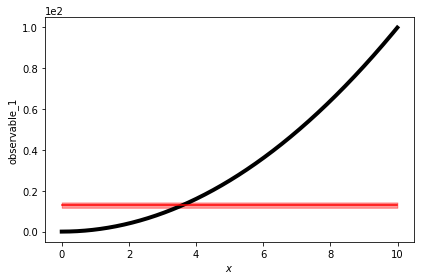

In [15]:
#########################
#### Plot the "data" #####
#########################

# Plot what the observable looks like over the parameter prior
plt.figure()
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel(r'$x$')
plt.ylabel(r'observable_1')

# Compute the posterior for a range of values of the parameter "x"
x_range=np.arange(xmin, xmax, (xmax-xmin)/1000.)
y_list = [ observable_1(x) for x in x_range ]

# Plot the posterior
plt.plot(x_range, y_list, "-", color='black', lw=4)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Plot the true value of the parameter "x", for comparison
# plt.axvline(x=x_truth,color='red')

# Plot the "data"
plt.plot(x_range, np.full_like(x_range, data_mean), color='red')
plt.fill_between(x_range, data_mean-data_uncert, data_mean+data_uncert, color='red',alpha=.4)

plt.tight_layout()
plt.show()

In [5]:
########################
# Get the calculations #
########################

# Number of points used for the "emulator"
number_design_emulator=10                     #<=========================================================

# For simplicity, we sample the emulator uniformly
x_list=np.linspace(xmin,xmax,num=number_design_emulator)    #<===========================================

calculation_mean_list=observable_1(x_list)

# Model calculations typically have some uncertainties as well
relative_uncertainty=0.03                    #<=========================================================
calculation_uncert_list=relative_uncertainty*calculation_mean_list

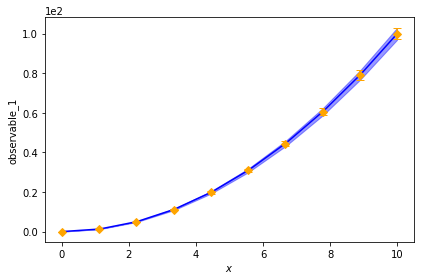

In [22]:
#########################################
# Make interpolator for each observable #
#########################################

emulator_calc=scipy.interpolate.interp1d(x_list, calculation_mean_list, kind='linear', copy=True, bounds_error=False, fill_value=None)
emulator_uncert=scipy.interpolate.interp1d(x_list, calculation_uncert_list, kind='linear', copy=True, bounds_error=False, fill_value=None)

# Plot the interpolator
# Plot what the observable looks like over the parameter prior
plt.figure()
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel(r'$x$')
plt.ylabel(r'observable_1')

# Compute the posterior for a range of values of the parameter "x"
x_range=np.arange(xmin, xmax, (xmax-xmin)/1000.)
y_list = emulator_calc(x_range)
y_list_uncert = emulator_uncert(x_range)

# Plot design points
plt.errorbar(x_list, calculation_mean_list, yerr=calculation_uncert_list, fmt='D', color='orange',capsize=4)

# Plot interpolator
plt.plot(x_range, y_list, color='blue')
plt.fill_between(x_range, y_list-y_list_uncert, y_list+y_list_uncert, color='blue',alpha=.4)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


plt.tight_layout()
plt.show()

In [7]:
#########################
# Compute the posterior #
#########################

# We assume uniform priors for this example
# Here 'x' is the only model parameter
def prior(x):
    
    return 1


# Under the approximations that we're using, the likelihood is
# exp(-1/2*\sum_{observables, pT} (model(observable,pT)-data(observable,pT))^2/(model_err(observable,pT)^2+exp_err(observable,pT)^2)

# Here 'x' is the only model parameter
def likelihood(x):

    res=0.0

    tmp_model_mean=emulator_calc(x)
    tmp_model_uncert=emulator_uncert(x)

    tmp_data_mean=data_mean
    tmp_data_uncert=data_uncert
    
    cov=(tmp_model_uncert*tmp_model_uncert+tmp_data_uncert*tmp_data_uncert)

    res+=np.power(tmp_model_mean-tmp_data_mean,2)/cov

    res*=-0.5

    return np.exp(res)/np.sqrt(cov)

#
def posterior(x):
    
    return prior(x)*likelihood(x)

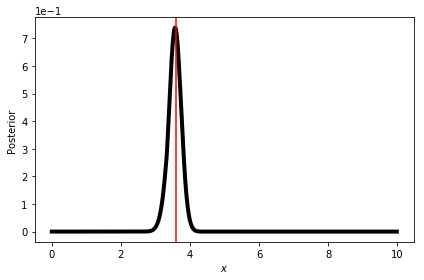

In [8]:
##################
# Plot posterior #
##################

plt.figure()
plt.xscale('linear')
plt.yscale('linear')
#plt.xlim(0,2)
#plt.ylim(1e-5,1e2)
plt.xlabel(r'$x$')
plt.ylabel(r'Posterior')

# Compute the posterior for a range of values of the parameter "x"
x_range=np.arange(xmin, xmax, (xmax-xmin)/1000.)
posterior_list = [ posterior(x) for x in x_range ]

# Plot the posterior
plt.plot(x_range, posterior_list, "-", color='black', lw=4)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# Plot the true value, for comparison
plt.axvline(x=x_truth,color='red')

#plt.legend(loc='upper right',fontsize=16)
plt.tight_layout()
plt.show()